# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Faizah Rizki Auliawati
- **Email:** frauliawati@gmail.com
- **ID Dicoding:** MC0092D5X2547


## Menentukan Pertanyaan Bisnis

- Kapan terjadi lonjakan dan penurunan aktivitas penyewaan sepeda dalam 24 jam?
- Bagaimana perbedaan musim mempengaruhi rata-rata penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

####Load Data Day

In [31]:
day_df = pd.read_csv('/content/drive/MyDrive/Bike Dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Insight :
- Membaca dataset harian (day.csv) yang berisi data penyewaan sepeda setiap hari.
- Menampilkan 5 baris pertama untuk melihat struktur dataset, termasuk kolom seperti tanggal, musim, jumlah penyewaan, dan faktor cuaca.

####Load Data Hour

In [32]:
hour_df = pd.read_csv('/content/drive/MyDrive/Bike Dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight :
- Membaca dataset per jam (hour.csv) yang berisi data penyewaan sepeda setiap jam.
- Menampilkan 5 baris pertama untuk melihat struktur dataset, dengan informasi tambahan seperti jam (hr) dan pola penyewaan lebih rinci dibandingkan dataset harian.

### Assessing Data

####Assesing Data Day

Menampilkan informasi day_df


In [33]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset memiliki 731 baris dan 16 kolom, tanpa nilai kosong (missing values)  
- Terdapat kombinasi tipe data numerik (int64, float64) dan kategorikal (object)  

Menampilkan jumlah nilai kosong dan duplikat day_df

In [34]:
missing_values_count = day_df.isnull().sum().sum()
duplicated_rows_count = day_df.duplicated().sum()

print(f"Missing Value: {missing_values_count}")
print(f"Duplicate: {duplicated_rows_count}")

Missing Value: 0
Duplicate: 0


**Insight:**
- Tidak ada missing values dalam dataset, sehingga tidak perlu dilakukan imputasi data.
- Tidak ada data duplikat, memastikan dataset sudah bersih dan siap untuk analisis lebih lanjut.

Menampilkan informasi deskriptif day_df

In [35]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**insight :**
- Menampilkan rata-rata, nilai minimum, maksimum, dan distribusi data untuk setiap kolom numerik.
- Berguna untuk memahami distribusi data sebelum analisis lebih lanjut.


####Assesing Data Hour

Menampilkan informasi hour_df

In [36]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dataset memiliki 17.379 baris dan 17 kolom.
- Tidak ada nilai kosong (missing values) dalam dataset, memastikan data lengkap untuk analisis.
- Kolom terdiri dari tipe data numerik (int64, float64) dan kategorikal (object).

Menampilkan jumlah nilai kosong dan duplikat hour_df

In [37]:
missing_values_count = hour_df.isnull().sum().sum()
duplicated_rows_count = hour_df.duplicated().sum()

print(f"Missing Value: {missing_values_count}")
print(f"Duplicate: {duplicated_rows_count}")

Missing Value: 0
Duplicate: 0


**Insight:**
- Tidak ada missing values, sehingga tidak diperlukan proses imputasi data.
- Tidak ada data duplikat, memastikan dataset sudah bersih dan siap digunakan untuk analisis lebih lanjut.

Menampilkan informasi deskriptif hour_df

In [38]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menampilkan statistik deskriptif seperti rata-rata, nilai minimum, maksimum, serta distribusi data untuk setiap kolom numerik.
- Berguna untuk memahami pola data dalam dataset sebelum melakukan eksplorasi lebih dalam.

### Cleaning Data

Mengapus Dataset day_df

In [39]:
del day_df

**Insight:**
- Dataset day_df dihapus dari memori karena tidak lagi diperlukan.
- Fokus analisis hanya menggunakan dataset hour_df yang memiliki granularitas lebih tinggi (per jam).

Mengubah nama kolom pada dataset `hour_df

In [40]:
expected_columns = [
    'instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday',
    'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
    'windspeed', 'casual', 'registered', 'cnt'
]

missing_columns = [col for col in expected_columns if col not in hour_df.columns]
if missing_columns:
    print(f"Kolom berikut tidak ditemukan dalam dataset: {missing_columns}")
else:

    hour_df.rename(columns={
        'instant': 'Indeks',
        'dteday': 'Tanggal',
        'season': 'Musim',
        'yr': 'Tahun',
        'mnth': 'Bulan',
        'hr': 'Jam',
        'holiday': 'Hari_Libur',
        'weekday': 'Hari',
        'workingday': 'Hari_Kerja',
        'weathersit': 'Cuaca',
        'temp': 'Temperatur',
        'atemp': 'Temperatur_Terasa',
        'hum': 'Kelembapan',
        'windspeed': 'Kecepatan_Angin',
        'casual': 'Pengguna_Kasual',
        'registered': 'Pengguna_Terdaftar',
        'cnt': 'Jumlah_Sewa'
    }, inplace=True)

    print("Kolom setelah diubah:", hour_df.columns)


Kolom setelah diubah: Index(['Indeks', 'Tanggal', 'Musim', 'Tahun', 'Bulan', 'Jam', 'Hari_Libur',
       'Hari', 'Hari_Kerja', 'Cuaca', 'Temperatur', 'Temperatur_Terasa',
       'Kelembapan', 'Kecepatan_Angin', 'Pengguna_Kasual',
       'Pengguna_Terdaftar', 'Jumlah_Sewa'],
      dtype='object')


**Insight :**
- Mengganti nama kolom agar lebih deskriptif dan mudah dibaca.
- Nama-nama kolom diubah ke bahasa Indonesia, seperti temp menjadi Temperatur, hum menjadi Kelembapan, dll.
- Tidak ada kolom yang hilang, sehingga dataset tetap lengkap.

Mengonversi Kolom Tanggal ke Format Datetime

In [41]:
hour_df['Tanggal'] = pd.to_datetime(hour_df['Tanggal'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Indeks              17379 non-null  int64         
 1   Tanggal             17379 non-null  datetime64[ns]
 2   Musim               17379 non-null  int64         
 3   Tahun               17379 non-null  int64         
 4   Bulan               17379 non-null  int64         
 5   Jam                 17379 non-null  int64         
 6   Hari_Libur          17379 non-null  int64         
 7   Hari                17379 non-null  int64         
 8   Hari_Kerja          17379 non-null  int64         
 9   Cuaca               17379 non-null  int64         
 10  Temperatur          17379 non-null  float64       
 11  Temperatur_Terasa   17379 non-null  float64       
 12  Kelembapan          17379 non-null  float64       
 13  Kecepatan_Angin     17379 non-null  float64   

**Insight :**
- Kolom Tanggal telah dikonversi menjadi format datetime, sehingga lebih mudah digunakan dalam analisis berbasis waktu.
- Dataset tetap memiliki 17.379 baris dan 17 kolom, tidak ada data yang hilang.
- Struktur dataset kini lebih bersih dan siap untuk analisis lebih lanjut.


## Exploratory Data Analysis (EDA)

### Explore ...

####Menghitung Rata-rata Penyewaan Sepeda per Jam

In [42]:
hourly_rental = hour_df.groupby("Jam")["Jumlah_Sewa"].mean().reset_index()

print(hourly_rental.sort_values(by="Jumlah_Sewa", ascending=False).head(5))
print(hourly_rental.sort_values(by="Jumlah_Sewa", ascending=True).head(5))

    Jam  Jumlah_Sewa
17   17   461.452055
18   18   425.510989
8     8   359.011004
16   16   311.983562
19   19   311.523352
   Jam  Jumlah_Sewa
4    4     6.352941
3    3    11.727403
5    5    19.889819
2    2    22.869930
1    1    33.375691


**Insight :**
- Jam 17:00 adalah puncak penyewaan sepeda, dengan rata-rata 461 sepeda disewa per jam.
- Penyewaan sepeda mulai meningkat pada pagi hari (jam 8:00) dan kembali naik pada sore hari (jam 16:00 - 19:00), menunjukkan adanya pola commuting (perjalanan pulang-pergi kerja/sekolah).
- Jam 4:00 - 5:00 adalah periode dengan penyewaan terendah, kemungkinan karena sebagian besar orang masih tidur atau belum memulai aktivitas.


####Menentukan Jam dengan Penyewaan Tertinggi dan Terendah

In [43]:
max_hour = hourly_rental.loc[hourly_rental["Jumlah_Sewa"].idxmax()]
print(f"Jam dengan penyewaan tertinggi: {max_hour['Jam']} dengan rata-rata {max_hour['Jumlah_Sewa']} sepeda")

min_hour = hourly_rental.loc[hourly_rental["Jumlah_Sewa"].idxmin()]
print(f"Jam dengan penyewaan terendah: {min_hour['Jam']} dengan rata-rata {min_hour['Jumlah_Sewa']} sepeda")

Jam dengan penyewaan tertinggi: 17.0 dengan rata-rata 461.45205479452056 sepeda
Jam dengan penyewaan terendah: 4.0 dengan rata-rata 6.352941176470588 sepeda


**Insight :**
- Jam 17:00 adalah jam dengan penyewaan tertinggi, kemungkinan disebabkan oleh banyak orang pulang kerja atau sekolah dan menggunakan sepeda sebagai moda transportasi.
- Jam 4:00 adalah jam dengan penyewaan terendah, menunjukkan bahwa hampir tidak ada aktivitas penyewaan pada dini hari.


####Mengonversi Kode Musim ke Label Nama Musim

In [44]:
musim_dict = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}

hour_df["Musim_Label"] = hour_df["Musim"].map(musim_dict)

**Insight :**
- Mengubah kode numerik pada kolom Musim menjadi nama musim yang lebih mudah dibaca dan diinterpretasikan.
- Dataset sekarang lebih siap untuk analisis berbasis musim.


####Menghitung Rata-Rata Penyewaan Sepeda per Musim

In [45]:
seasonal_rental = hour_df.groupby("Musim_Label")["Jumlah_Sewa"].mean().reset_index()

**Insight :**
- Mengelompokkan data berdasarkan musim, untuk melihat pola penyewaan sepeda di musim yang berbeda.
- Berguna untuk memahami bagaimana faktor musim mempengaruhi jumlah penyewaan.

####Menampilkan Hasil Penyewaan Berdasarkan Musim

In [46]:

print("Hasil penyewaan sepeda per musim:")
print(seasonal_rental.sort_values(by="Jumlah_Sewa", ascending=False))

Hasil penyewaan sepeda per musim:
  Musim_Label  Jumlah_Sewa
1       Gugur   236.016237
2       Panas   208.344069
0      Dingin   198.868856
3        Semi   111.114569


**Insight :**
- Musim Gugur memiliki penyewaan tertinggi, kemungkinan karena cuaca yang lebih nyaman untuk bersepeda.
- Musim Semi memiliki penyewaan terendah, bisa jadi karena cuaca masih dingin atau hujan yang menghambat penggunaan sepeda.
- Musim Panas dan Dingin masih memiliki angka penyewaan yang cukup tinggi, menunjukkan bahwa pengguna tetap aktif meskipun ada perubahan musim.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan terjadi lonjakan dan penurunan aktivitas penyewaan sepeda dalam 24 jam?

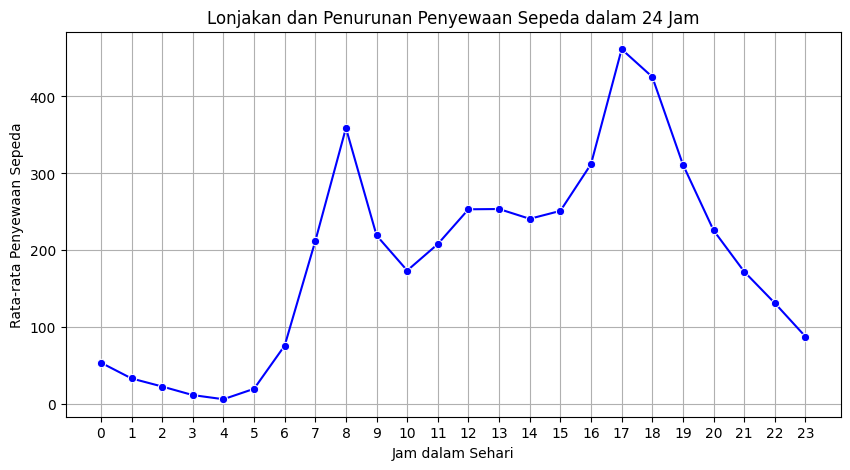

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_rental["Jam"], y=hourly_rental["Jumlah_Sewa"], marker="o", color="b")

plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Lonjakan dan Penurunan Penyewaan Sepeda dalam 24 Jam")
plt.xticks(range(0, 24))
plt.grid()

plt.show()

**Insight :**
-  Pola penyewaan sepeda membentuk dua puncak utama, yaitu pagi (sekitar jam 08:00) dan sore (sekitar jam 17:00 - 18:00).
-  Lonjakan pagi kemungkinan disebabkan oleh orang yang berangkat kerja atau sekolah.
-  Lonjakan sore terjadi saat jam pulang kerja, yang menunjukkan banyaknya pengguna sepeda untuk perjalanan pulang.
-  Aktivitas penyewaan sepeda menurun di tengah malam hingga subuh, yang wajar karena jam istirahat.

### Pertanyaan 2 : Bagaimana perbedaan musim mempengaruhi rata-rata penyewaan sepeda?

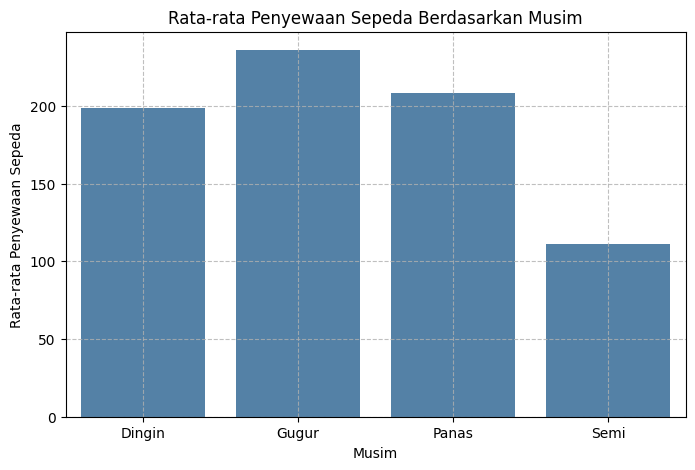

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x=seasonal_rental["Musim_Label"], y=seasonal_rental["Jumlah_Sewa"], color="steelblue")

plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")

plt.grid(linestyle="--", alpha=0.8)
plt.show()

**Insight:**
- Rata-rata penyewaan sepeda pada musim gugur adalah yang tertinggi dibanding musim lainnya, bisa jadi karena cuaca yang lebih nyaman untuk bersepeda (tidak terlalu panas atau dingin).
- Rata-rata penyewaan sepeda di musim semi jauh lebih rendah dibanding musim lainnya, kemungkinan penyebabnya adalah hujan lebih sering terjadi di musim ini, atau suhu yang masih relatif dingin setelah musim dingin.
- Musim panas memiliki penyewaan sepeda yang hampir setara dengan musim gugur, menunjukkan bahwa banyak orang tetap bersepeda meskipun cuaca lebih panas.
- Musim dingin juga memiliki angka penyewaan yang cukup tinggi, yang bisa jadi menunjukkan bahwa sebagian besar pengguna adalah commuter (pengguna harian) yang tetap menggunakan sepeda sebagai transportasi utama.


## Analisis Lanjutan (Opsional)

#### Analisis Penyewaan Sepeda Berdasarkan Kategori Waktu dengan Clustering Manual Grouping

In [50]:
def categorize_hour(hour):
    if 0 <= hour < 6:
        return "Dini Hari"
    elif 6 <= hour < 11:
        return "Pagi"
    elif 11 <= hour < 16:
        return "Siang"
    elif 16 <= hour < 21:
        return "Sore"
    else:
        return "Malam"

hour_df["Kategori_Waktu"] = hour_df["Jam"].apply(categorize_hour)
grouped_by_time = hour_df.groupby("Kategori_Waktu")["Jumlah_Sewa"].mean().reset_index()
order = ["Dini Hari", "Pagi", "Siang", "Sore", "Malam"]

print("Penyewaan sepeda berdasarkan kategori waktu:\n", grouped_by_time.sort_values(by="Jumlah_Sewa", ascending=False))


Penyewaan sepeda berdasarkan kategori waktu:
   Kategori_Waktu  Jumlah_Sewa
4           Sore   347.343304
3          Siang   241.475563
2           Pagi   208.092210
1          Malam   130.493590
0      Dini Hari    24.908559


**Insight :**
- Penyewaan tertinggi terjadi di sore hari, mungkin karena orang pulang kerja/sekolah.
- Siang dan pagi juga cukup tinggi, menandakan penggunaan untuk aktivitas harian.
- Malam lebih rendah, kemungkinan karena faktor keamanan dan kelelahan pengguna.
- Dini hari paling sedikit, wajar karena mayoritas orang beristirahat.

Visualisasi Rata-Rata Penyewaan Sepeda Berdasarkan Kategori *Waktu*

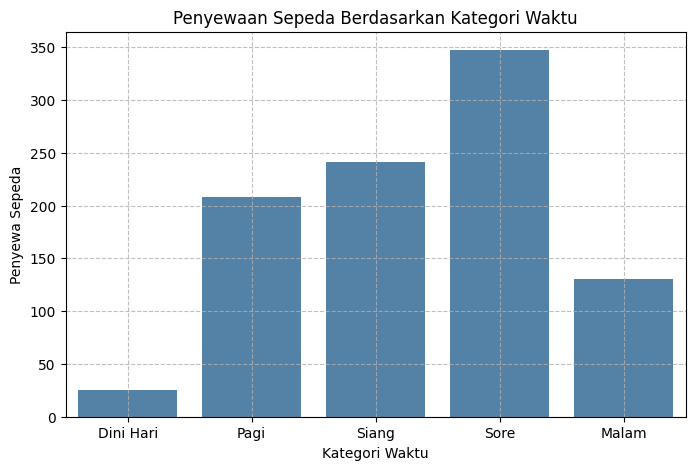

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(x=grouped_by_time["Kategori_Waktu"], y=grouped_by_time["Jumlah_Sewa"], order=order, color="steelblue")

plt.xlabel("Kategori Waktu")
plt.ylabel("Penyewa Sepeda")
plt.title("Penyewaan Sepeda Berdasarkan Kategori Waktu")

plt.grid(linestyle="--", alpha=0.8)
plt.show()

**Insight :**
- Sore hari jadi puncak penyewaan, kemungkinan karena pulang kerja/sekolah.
- Pagi & siang tinggi, mencerminkan commuting & rekreasi.
- Malam & dini hari rendah, mungkin karena faktor keamanan & aktivitas berkurang.
- Pola ini menunjukkan bahwa penyewaan sepeda berhubungan erat dengan mobilitas harian dan kebiasaan pengguna.

#### Analisis Penyewaan Sepeda Berdasarkan Musim dengan Clustering Manual Grouping

In [53]:
musim_dict = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}

hour_df["Musim_Label"] = hour_df["Musim"].map(musim_dict)

seasonal_rental = hour_df.groupby("Musim_Label")["Jumlah_Sewa"].mean().reset_index()

def categorize_season(rental):
    if rental > seasonal_rental["Jumlah_Sewa"].quantile(0.75):
        return "Musim Tinggi"
    elif rental < seasonal_rental["Jumlah_Sewa"].quantile(0.25):
        return "Musim Rendah"
    else:
        return "Musim Sedang"

seasonal_rental["Kategori_Penyewaan"] = seasonal_rental["Jumlah_Sewa"].apply(categorize_season)


order = ["Semi", "Panas", "Gugur", "Dingin"]
print("Penyewaan berdasarkan kategori musim:\n", seasonal_rental.sort_values(by="Jumlah_Sewa", ascending=False))


Penyewaan berdasarkan kategori musim:
   Musim_Label  Jumlah_Sewa Kategori_Penyewaan
1       Gugur   236.016237       Musim Tinggi
2       Panas   208.344069       Musim Sedang
0      Dingin   198.868856       Musim Sedang
3        Semi   111.114569       Musim Rendah


**Insight :**
- Musim gugur memiliki penyewaan tertinggi, mungkin karena cuaca sejuk & nyaman.
- Musim panas & dingin moderat, kemungkinan karena suhu ekstrem memengaruhi minat pengguna.
- Musim semi terendah, mungkin akibat cuaca yang kurang mendukung atau curah hujan tinggi.

Visualisasi Penyewaan Sepeda Berdasarkan Musim

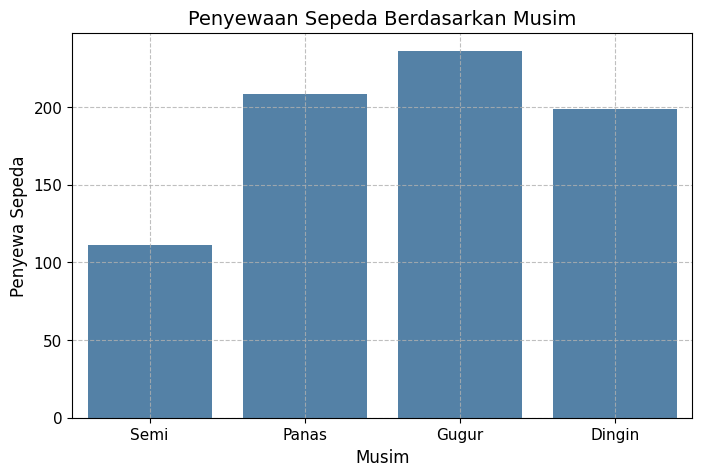

In [57]:
plt.figure(figsize=(8,5))
ax = sns.barplot(
    x=seasonal_rental["Musim_Label"],
    y=seasonal_rental["Jumlah_Sewa"],
    order=order,
    color="steelblue"
)

plt.xlabel("Musim", fontsize=12)
plt.ylabel("Penyewa Sepeda", fontsize=12)
plt.title("Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.grid(linestyle="--", alpha=0.8)
plt.show()

**Insight :**
- Puncak penyewaan terjadi di musim gugur, menunjukkan kondisi cuaca yang ideal untuk bersepeda.
- Musim panas & dingin memiliki penyewaan sedang, mungkin karena faktor suhu ekstrem yang memengaruhi kenyamanan.
- Musim semi memiliki penyewaan terendah, kemungkinan karena hujan lebih sering terjadi.
- Perlu strategi promosi di musim rendah, seperti diskon atau event khusus untuk meningkatkan minat penyewa.

## Conclusion

- **Conclution pertanyaan 1 :** Kapan terjadi lonjakan dan penurunan aktivitas penyewaan sepeda dalam 24 jam?

Berdasarkan analisis, lonjakan aktivitas penyewaan sepeda terjadi pada sore hari (16:00 - 21:00), dengan jumlah penyewa tertinggi dibandingkan kategori waktu lainnya. Hal ini kemungkinan besar disebabkan oleh tingginya aktivitas masyarakat setelah jam kerja dan sekolah, serta waktu yang ideal untuk rekreasi. Aktivitas penyewaan juga cukup tinggi pada siang hari (11:00 - 16:00) dan pagi hari (06:00 - 11:00), yang mungkin terkait dengan mobilitas pekerja, mahasiswa, serta aktivitas olahraga pagi. Sebaliknya, penurunan aktivitas terjadi pada malam hari (21:00 - 00:00), dengan jumlah penyewaan yang lebih rendah karena keterbatasan visibilitas dan faktor keamanan. Penyewaan terendah terjadi pada dini hari (00:00 - 06:00), saat sebagian besar orang beristirahat dan kondisi jalanan relatif sepi.



- **Conclution pertanyaan 2 :** Bagaimana perbedaan musim mempengaruhi rata-rata penyewaan sepeda?

Musim memiliki pengaruh yang signifikan terhadap rata-rata penyewaan sepeda. Musim gugur mencatat penyewaan tertinggi, kemungkinan karena suhu yang lebih sejuk dan cuaca yang lebih stabil, membuatnya nyaman untuk bersepeda. Musim panas dan musim dingin berada dalam kategori sedang, di mana musim panas dapat meningkatkan penyewaan karena liburan, tetapi suhu yang terlalu panas bisa menjadi faktor pembatas. Sementara itu, musim dingin bisa mengurangi minat penyewaan karena suhu dingin dan kemungkinan adanya hujan atau salju. Musim semi memiliki penyewaan terendah, kemungkinan karena curah hujan yang lebih tinggi yang membuat kondisi jalanan kurang ideal untuk bersepeda. Secara keseluruhan, suhu yang nyaman dan kondisi cuaca yang stabil cenderung meningkatkan jumlah penyewaan sepeda.